In [199]:
import pandas as pd
import numpy as np
import os
import csv
import warnings
warnings.filterwarnings("ignore")


In [200]:
# Creation of dataframes of the different csv files
dataframes = []
for dirname, _, filenames in os.walk('./datasets/1_SEGMENTATION'):
    for filename in filenames:
        file = filename.replace('.csv', '_df')
        filepath = os.path.join(dirname, filename)
        # Sniff the delimiter using csv.Sniffer
        with open(filepath, 'r', newline='') as csvfile:
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(csvfile.read(4096))  # Read a sample to sniff
            separator = dialect.delimiter
        # Read the CSV file with the detected separator
        df = pd.read_csv(filepath, sep=separator, encoding="UTF-8")
        globals()[file] = df.copy()
        dataframes.append(df)
        print(file,'-','\n','Rows:',df.shape[0],'\n','Columns:',df.shape[1])
print('Data imported')

RETAIL.txt - 
 Rows: 20 
 Columns: 1
RETAIL_PRODUCT_df - 
 Rows: 2800 
 Columns: 3
RETAIL_REGISTRY_df - 
 Rows: 25727 
 Columns: 4
RETAIL_SALES_df - 
 Rows: 489967 
 Columns: 6
RETAIL_SALES_DETAIL_df - 
 Rows: 2047073 
 Columns: 6
Data imported


In [201]:
# Dataframes
rp_df = RETAIL_PRODUCT_df
rr_df = RETAIL_REGISTRY_df
rs_df = RETAIL_SALES_df
rsd_df = RETAIL_SALES_DETAIL_df

# <u><i>Product Dataframe Exploration</i></u>
<u><b><i>Description</i></b></u>: Dataset containing information on product classification

In [202]:
# View the data in the retail product dataframe
rp_df.head()

,PRODUCT_ID,CATEGORY_ID,CATEGORY_DESC
0,92887,4,POULTRY
1,102017,1,OTHER_FROZEN
2,103710,3,READY-MADE
3,10184,7,FISH
4,10328,16,OTHER


In [203]:
rp_df.describe()

,PRODUCT_ID,CATEGORY_ID
count,2800.000000,2800.000000
mean,124085.044643,8.869286
std,68971.147276,4.557134
min,36.000000,0.000000
25%,81400.000000,4.000000
50%,134552.000000,11.000000
75%,177499.250000,12.000000
max,257836.000000,16.000000


# <u><i>Registry Dataframe Exploration</i></u>
<u><b><i>Description</i></b></u>: Dataset containing information on the client's registration process  

## Special Columns
<b><i>CREATION_DATE</i></b>: date of first registration of the client  
<b><i>REGIONAL_CODE</i></b>: coding of the geographical region of residence  
<b><i>ORIGIN</i></b>: channel of registration  

In [204]:
# View the data in the retail registry dataframe
rr_df.head()

,CUSTOMER_ID,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,AA00312188,2005-11-05,11,WEB
1,AA00312390,2009-01-17,42,WEB
2,AA00325975,2005-01-04,11,WEB
3,AA00336843,2014-03-12,11,WEB
4,AA00339761,2004-02-13,6,WEB


In [205]:
rr_df.describe()

,REGIONAL_CODE
count,25727.000000
mean,31.801570
std,19.849741
min,1.000000
25%,13.000000
50%,30.000000
75%,47.000000
max,82.000000


# <u><i>Sales Dataframe Exploration</i></u>
<u><b><i>Description</i></b></u>: Dataset containg aggregate level infomration on purchases at client-date level  

## Special Columns
<b><i>DATE</i></b>: date of purchase  
<b><i>OUTLET_ID</i></b>: coding of the store of reference  
<b><i>PAYMENT_METHOD</i></b>: payment method  
<b><i>TIME</i></b>: time of delivery  
<b><i>TOTAL_POINTS</i></b>: amount of fidelity point acquired   

In [206]:
# View the data in the retail sales dataframe
rs_df.head()

,CUSTOMER_ID,DATE,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS
0,AA00312188,2019-02-14,64,CASH,14:39:56,290.0
1,AA00312188,2019-02-28,64,CASH,14:19:14,155.0
2,AA00312188,2019-03-14,64,CASH,14:39:26,295.0
3,AA00312188,2018-09-27,64,CASH,14:53:44,115.0
4,AA00312188,2019-04-25,64,CASH,14:49:31,290.0


In [207]:
rs_df.describe()

,OUTLET_ID,TOTAL_POINTS
count,489967.000000,468099.000000
mean,49.703980,60.079663
std,36.056757,1272.051275
min,0.000000,-146915.000000
25%,17.000000,110.000000
50%,38.000000,195.000000
75%,81.000000,315.000000
max,141.000000,9180.000000


# <u><i>Sale Detail Dataframe Exploration</i></u>
<u><b><i>Description</i></b></u>: Dataset containing information on purchases' receipt lines at client-date level  

## Special Columns
<b><i>DATE</i></b>: date of purchase  
<b><i>PRODUCT_ID</i></b>: identification code of the purchased item  
<b><i>QUANTITY</i></b>: quantity of the purchased item  
<b><i>LIST_PRICE</i></b>: listing price of the purchased item  
<b><i>SPECIAL</i></b>: indicator for item with special offer   

In [208]:
# View the data in the retail sales detail dataframe
rsd_df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN
1,BF00404312,2020-01-17,94580,1.0,6.25,NaN
2,BF00404312,2020-01-17,224046,1.0,4.95,NaN
3,BF00404312,2020-01-17,17284,1.0,5.25,NaN
4,BF00404312,2020-01-17,130905,1.0,5.95,NaN


In [209]:
rsd_df.describe()

,PRODUCT_ID,QUANTITY,LIST_PRICE
count,2.047073e+06,2.047073e+06,2.025369e+06
mean,7.393058e+04,1.136371e+00,8.091309e+00
std,7.768726e+04,1.716446e+00,5.669495e+00
min,-1.200000e+01,-4.800000e+01,-3.048000e+02
25%,2.942000e+03,1.000000e+00,4.950000e+00
50%,4.415400e+04,1.000000e+00,6.950000e+00
75%,1.387850e+05,1.000000e+00,9.950000e+00
max,2.537530e+05,1.000000e+03,3.704500e+02


In [210]:
anan= rsd_df
anan = anan.merge(rs_df, how = 'inner', on = ['CUSTOMER_ID', 'DATE'] )
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14,CASH,15:06:37,-3960.0
1,BF00404312,2020-01-17,94580,1.0,6.25,NaN,14,CASH,15:06:37,-3960.0
2,BF00404312,2020-01-17,224046,1.0,4.95,NaN,14,CASH,15:06:37,-3960.0
3,BF00404312,2020-01-17,17284,1.0,5.25,NaN,14,CASH,15:06:37,-3960.0
4,BF00404312,2020-01-17,130905,1.0,5.95,NaN,14,CASH,15:06:37,-3960.0


In [211]:
anan = anan.merge(rp_df, how = 'inner', on = ['PRODUCT_ID'], )
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14,CASH,15:06:37,-3960.0,3,READY-MADE
1,WG00404070,2020-01-21,1068,4.0,27.40,NaN,105,CASH,17:24:16,615.0,3,READY-MADE
2,EB00404430,2020-01-26,1068,1.0,6.95,NaN,14,CASH,09:49:34,-3275.0,3,READY-MADE
3,WD04132126,2019-10-08,1068,1.0,6.85,NaN,14,DEBIT CARD,16:11:57,1130.0,3,READY-MADE
4,DK00406358,2019-06-08,1068,2.0,13.70,NaN,14,CASH,17:38:48,385.0,3,READY-MADE


In [212]:
anan = anan.merge(rr_df, how = 'inner', on = ['CUSTOMER_ID'], )
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB
1,BF00404312,2018-11-09,1068,1.0,6.65,NaN,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB
2,BF00404312,2020-01-17,94580,1.0,6.25,NaN,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB
3,BF00404312,2019-08-16,94580,1.0,6.25,NaN,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB
4,BF00404312,2019-11-10,94580,1.0,6.25,NaN,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB


In [213]:
anan['SPECIAL'] = anan['SPECIAL'].fillna(0)
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB


In [214]:
anan['SPECIAL'].replace({'Y': '1'}, inplace=True)
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB


In [215]:
check1 = anan.loc[anan['SPECIAL'] == '1']
check1.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
2180,SE00406611,2019-12-21,241993,1.0,6.45,1,14,CREDIT CARD,16:47:27,-6670.0,3,READY-MADE,2004-02-01,23,WEB
2518,ED04351015,2019-12-19,242233,1.0,5.45,1,8,DEBIT CARD,17:22:48,290.0,3,READY-MADE,2016-03-31,36,WEB
4051,AF02709185,2019-12-12,242233,2.0,10.90,1,14,CREDIT CARD,11:48:49,580.0,3,READY-MADE,2012-09-29,23,STORE
4716,NR04993500,2019-12-10,241993,1.0,6.45,1,8,DEBIT CARD,13:28:23,290.0,3,READY-MADE,2014-11-28,36,WEB
5060,YB00404591,2019-12-18,185860,1.0,6.75,1,14,CASH,14:10:31,235.0,13,DRINKS,2008-01-13,23,WEB


In [216]:
anan.describe()

,PRODUCT_ID,QUANTITY,LIST_PRICE,OUTLET_ID,TOTAL_POINTS,CATEGORY_ID,REGIONAL_CODE
count,2.047962e+06,2.047962e+06,2.026404e+06,2.047962e+06,1.994093e+06,2.047962e+06,2.047962e+06
mean,7.404719e+04,1.136169e+00,8.106861e+00,4.941574e+01,8.663137e+01,6.030331e+00,3.145012e+01
std,7.769339e+04,1.714687e+00,5.661384e+00,3.592643e+01,1.644398e+03,3.981517e+00,1.970878e+01
min,3.600000e+01,-4.800000e+01,-3.048000e+02,0.000000e+00,-1.469150e+05,0.000000e+00,1.000000e+00
25%,2.942000e+03,1.000000e+00,4.950000e+00,1.700000e+01,1.650000e+02,3.000000e+00,1.300000e+01
50%,4.417800e+04,1.000000e+00,6.950000e+00,3.800000e+01,2.850000e+02,6.000000e+00,3.000000e+01
75%,1.387970e+05,1.000000e+00,9.950000e+00,8.100000e+01,4.400000e+02,1.000000e+01,4.700000e+01
max,2.537530e+05,1.000000e+03,3.704500e+02,1.410000e+02,9.180000e+03,1.600000e+01,8.200000e+01


In [217]:
anan.isna().sum()

CUSTOMER_ID           0
DATE                  0
PRODUCT_ID            0
QUANTITY              0
LIST_PRICE        21558
SPECIAL               0
OUTLET_ID             0
PAYMENT_METHOD        0
TIME                  0
TOTAL_POINTS      53869
CATEGORY_ID           0
CATEGORY_DESC         0
CREATION_DATE      1246
REGIONAL_CODE         0
ORIGIN                0
dtype: int64

In [218]:
anan[anan['CREATION_DATE'].isna()]

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
360363,IU00325003,2019-10-03,224046,1.0,4.95,0,85,CASH,11:50:29,375.0,11,FRUIT,NaN,1,WEB
360364,IU00325003,2019-11-14,224046,1.0,4.95,0,85,CASH,11:49:00,405.0,11,FRUIT,NaN,1,WEB
360365,IU00325003,2019-10-17,1621,1.0,8.95,0,85,CASH,12:05:05,210.0,3,READY-MADE,NaN,1,WEB
360366,IU00325003,2019-12-12,1621,1.0,8.95,0,85,CASH,11:19:53,325.0,3,READY-MADE,NaN,1,WEB
360367,IU00325003,2018-12-27,1621,1.0,8.95,0,85,CASH,11:35:28,200.0,3,READY-MADE,NaN,1,WEB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022118,KX01018163,2019-05-28,121489,2.0,14.90,0,85,CASH,15:37:56,145.0,1,OTHER_FROZEN,NaN,34,WEB
2022119,KX01018163,2019-05-15,214881,1.0,7.65,0,36,CASH,18:47:54,135.0,1,OTHER_FROZEN,NaN,34,WEB
2022120,KX01018163,2019-05-15,212238,1.0,0.00,0,36,CASH,18:47:54,135.0,16,OTHER,NaN,34,WEB
2022121,KX01018163,2018-09-04,21199,1.0,5.95,0,85,CASH,15:48:32,80.0,9,FRIES,NaN,34,WEB


In [219]:
anan['CREATION_DATE'] = anan['CREATION_DATE'].fillna('DATE')
anan[anan['CREATION_DATE'].isna()]

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN


In [220]:
anan[anan['TOTAL_POINTS'].isna()]

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
479,DK00406358,2019-04-04,138365,1.0,0.00,0,14,CASH,17:36:42,NaN,12,ACCESSORIES,2011-01-30,23,WEB
480,DK00406358,2019-04-04,139362,1.0,35.00,0,14,CASH,17:36:42,NaN,12,ACCESSORIES,2011-01-30,23,WEB
697,BC03658193,2019-03-29,1068,1.0,6.85,0,95,CASH,11:28:18,NaN,3,READY-MADE,2016-09-01,30,STORE
710,BC03658193,2019-03-01,4095,1.0,0.05,0,95,CASH,11:49:44,NaN,12,ACCESSORIES,2016-09-01,30,STORE
711,BC03658193,2019-03-15,4095,1.0,0.05,0,95,CASH,11:34:51,NaN,12,ACCESSORIES,2016-09-01,30,STORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047915,PR03897198,2018-12-25,155565,1.0,0.00,0,92,CASH,10:20:59,NaN,16,OTHER,2013-12-22,25,PHONE
2047921,MF04072193,2019-04-30,468,1.0,8.95,0,30,CASH,13:06:46,NaN,1,OTHER_FROZEN,2014-02-06,5,STORE
2047944,LD04688549,2019-10-29,188491,12.0,13.50,0,132,CASH,14:59:31,NaN,13,DRINKS,2016-08-11,28,STORE
2047946,LD04688549,2019-10-29,188731,2.0,74.50,0,132,CASH,14:59:31,NaN,13,DRINKS,2016-08-11,28,STORE


In [221]:
anan['TOTAL_POINTS'] = anan['TOTAL_POINTS'].fillna(0)
anan[anan['TOTAL_POINTS'].isna()]

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN


In [222]:
check2 = anan.loc[anan['TOTAL_POINTS'] == 0]
check2.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
479,DK00406358,2019-04-04,138365,1.0,0.00,0,14,CASH,17:36:42,0.0,12,ACCESSORIES,2011-01-30,23,WEB
480,DK00406358,2019-04-04,139362,1.0,35.00,0,14,CASH,17:36:42,0.0,12,ACCESSORIES,2011-01-30,23,WEB
697,BC03658193,2019-03-29,1068,1.0,6.85,0,95,CASH,11:28:18,0.0,3,READY-MADE,2016-09-01,30,STORE
710,BC03658193,2019-03-01,4095,1.0,0.05,0,95,CASH,11:49:44,0.0,12,ACCESSORIES,2016-09-01,30,STORE
711,BC03658193,2019-03-15,4095,1.0,0.05,0,95,CASH,11:34:51,0.0,12,ACCESSORIES,2016-09-01,30,STORE


In [223]:
anan.isna().sum()

CUSTOMER_ID           0
DATE                  0
PRODUCT_ID            0
QUANTITY              0
LIST_PRICE        21558
SPECIAL               0
OUTLET_ID             0
PAYMENT_METHOD        0
TIME                  0
TOTAL_POINTS          0
CATEGORY_ID           0
CATEGORY_DESC         0
CREATION_DATE         0
REGIONAL_CODE         0
ORIGIN                0
dtype: int64

In [224]:
anan['LIST_PRICE'] = anan['LIST_PRICE'].fillna(0)
anan.isna().sum()

CUSTOMER_ID       0
DATE              0
PRODUCT_ID        0
QUANTITY          0
LIST_PRICE        0
SPECIAL           0
OUTLET_ID         0
PAYMENT_METHOD    0
TIME              0
TOTAL_POINTS      0
CATEGORY_ID       0
CATEGORY_DESC     0
CREATION_DATE     0
REGIONAL_CODE     0
ORIGIN            0
dtype: int64

In [225]:
anan.dtypes

CUSTOMER_ID        object
DATE               object
PRODUCT_ID          int64
QUANTITY          float64
LIST_PRICE        float64
SPECIAL            object
OUTLET_ID           int64
PAYMENT_METHOD     object
TIME               object
TOTAL_POINTS      float64
CATEGORY_ID         int64
CATEGORY_DESC      object
CREATION_DATE      object
REGIONAL_CODE       int64
ORIGIN             object
dtype: object

In [226]:
column_name = 'CREATION_DATE'

# Access the 2199th row of the specified column if it's not "DATE"
value = anan.loc[2198, column_name] if anan.loc[2198, column_name] != "DATE" else None

print("Value at 2199th row of column '{}': {}".format(column_name, value))

Value at 2199th row of column 'CREATION_DATE': 2004-02-01


In [227]:

from datetime import datetime

# Convert 'BirthDate' column to datetime format
anan['CREATION_DATE1'] = pd.to_datetime(anan['CREATION_DATE'], errors='coerce')

# Define the specific date
specific_date = datetime(2020, 1, 26)

# Calculate age from specific date
anan['CUST_YEAR'] = (specific_date - anan['CREATION_DATE1']) // pd.Timedelta(days=365.25)
check3 = anan.loc[anan['CREATION_DATE1'] != "NaT"]
check3.head()
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CREATION_DATE1,CUST_YEAR
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0


In [228]:
# Function to extract hour from time string
def extract_hour(time_str):
    return int(time_str.split(':')[0])

# Apply the function to extract hours and create a new column
anan['Transaction_Hour'] = anan['TIME'].apply(extract_hour)

anan.head()

# Convert transactıon hr to categorıcal data Mornıng Nıght Afternoon


,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CREATION_DATE1,CUST_YEAR,Transaction_Hour
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0,15
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0,18
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0,15
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0,18
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0,14


In [229]:
#anan['TRANSACTION_VALUE'] = anan['LIST_PRICE'] * anan['QUANTITY']
#anan.head()

In [230]:
from datetime import datetime
anan['DATE1'] = pd.to_datetime(anan['DATE'])
anan['Weekday'] = anan['DATE1'].dt.weekday
anan.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CREATION_DATE1,CUST_YEAR,Transaction_Hour,DATE1,Weekday
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0,15,2020-01-17,4
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0,18,2018-11-09,4
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0,15,2020-01-17,4
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0,18,2019-08-16,4
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB,2003-04-02,16.0,14,2019-11-10,6


In [231]:
anan['TYPE'] = None
for index, row in anan.iterrows():
    if row['QUANTITY'] < 0 or row['LIST_PRICE'] < 0:
        anan.at[index, 'TYPE'] = "RETURN"
    elif row['QUANTITY'] > 0 and row['LIST_PRICE'] == 0:
        anan.at[index, 'TYPE'] = "PROMOTION"
    else :
        anan.at[index, 'TYPE'] = "BUY"

anan.head()


,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CREATION_DATE1,CUST_YEAR,Transaction_Hour,DATE1,Weekday,TYPE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,...,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0,15,2020-01-17,4,BUY
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,...,READY-MADE,2003-04-02,23,WEB,2003-04-02,16.0,18,2018-11-09,4,BUY
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,...,FISH,2003-04-02,23,WEB,2003-04-02,16.0,15,2020-01-17,4,BUY
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,...,FISH,2003-04-02,23,WEB,2003-04-02,16.0,18,2019-08-16,4,BUY
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,...,FISH,2003-04-02,23,WEB,2003-04-02,16.0,14,2019-11-10,6,BUY


In [232]:
anan['TRANSACTION_VALUE'] = None

# Iterate over each row
for index, row in anan.iterrows():
    if row['TYPE'] == "BUY" or row['TYPE'] == "PROMOTION":
        anan.at[index, 'TRANSACTION_VALUE'] = abs(row['LIST_PRICE']) * abs(row['QUANTITY'])
    else:
        anan.at[index, 'TRANSACTION_VALUE'] = -(abs(row['LIST_PRICE']) * abs(row['QUANTITY']))

anan.head()


,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,CREATION_DATE,REGIONAL_CODE,ORIGIN,CREATION_DATE1,CUST_YEAR,Transaction_Hour,DATE1,Weekday,TYPE,TRANSACTION_VALUE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,...,2003-04-02,23,WEB,2003-04-02,16.0,15,2020-01-17,4,BUY,6.85
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,...,2003-04-02,23,WEB,2003-04-02,16.0,18,2018-11-09,4,BUY,6.65
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,...,2003-04-02,23,WEB,2003-04-02,16.0,15,2020-01-17,4,BUY,6.25
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,...,2003-04-02,23,WEB,2003-04-02,16.0,18,2019-08-16,4,BUY,6.25
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,...,2003-04-02,23,WEB,2003-04-02,16.0,14,2019-11-10,6,BUY,6.25


array([[<Axes: title={'center': 'PRODUCT_ID'}>,
        <Axes: title={'center': 'QUANTITY'}>,
        <Axes: title={'center': 'LIST_PRICE'}>],
       [<Axes: title={'center': 'OUTLET_ID'}>,
        <Axes: title={'center': 'TOTAL_POINTS'}>,
        <Axes: title={'center': 'CATEGORY_ID'}>],
       [<Axes: title={'center': 'REGIONAL_CODE'}>,
        <Axes: title={'center': 'CREATION_DATE1'}>,
        <Axes: title={'center': 'CUST_YEAR'}>],
       [<Axes: title={'center': 'Transaction_Hour'}>,
        <Axes: title={'center': 'DATE1'}>,
        <Axes: title={'center': 'Weekday'}>]], dtype=object)

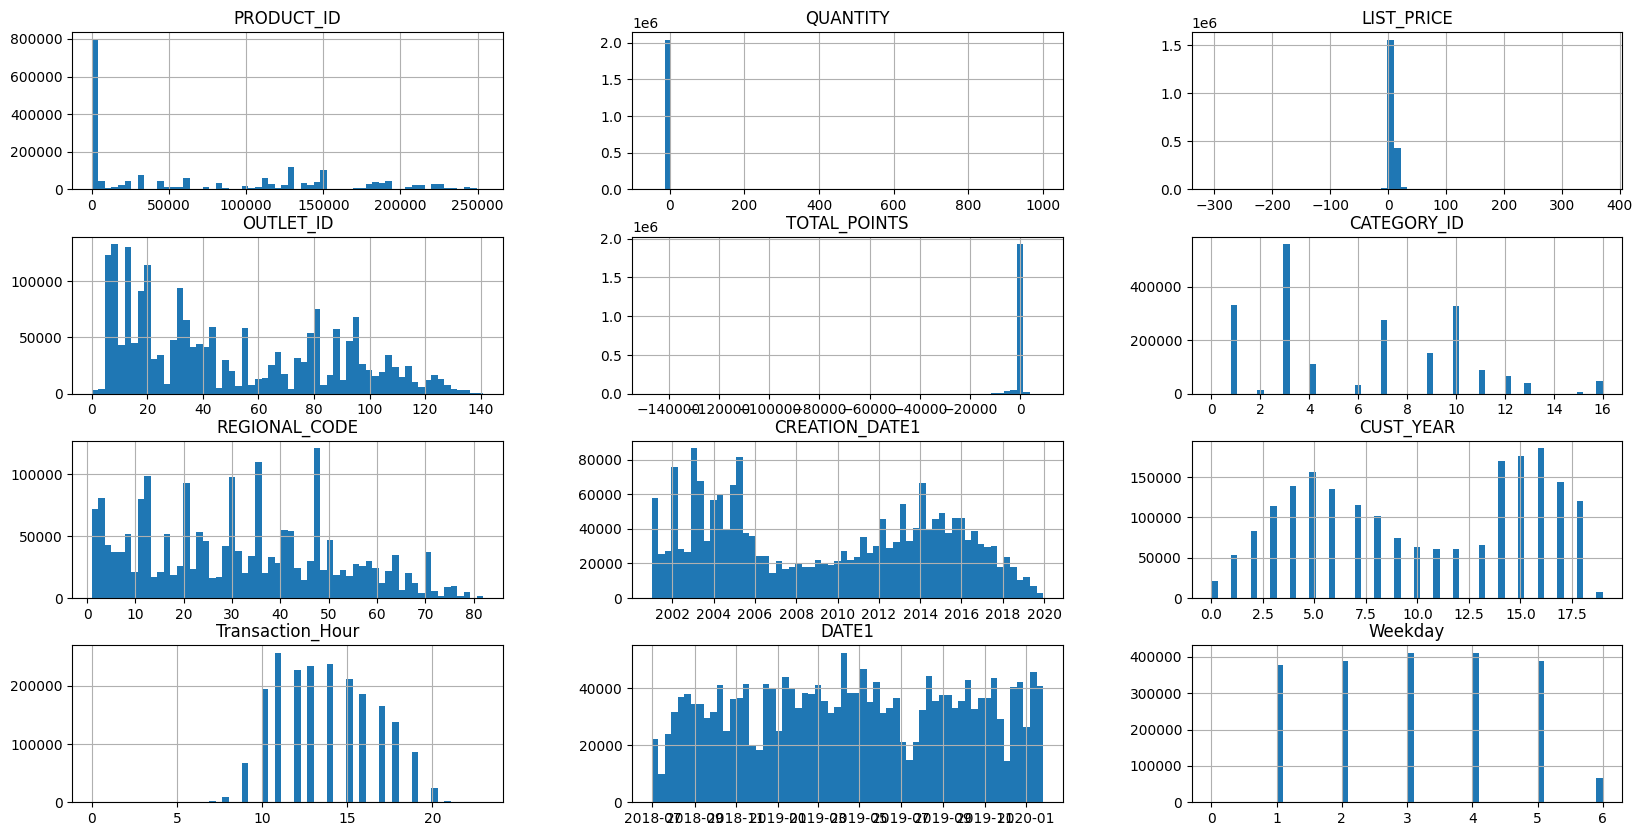

In [233]:
anan.hist(bins=60, figsize=(20,10))

MONETARY VALUES FOR DIFFERENT PARAMETERS THAT CAN WORK

In [234]:
cust_spent = anan.groupby(['CUSTOMER_ID'])[['TRANSACTION_VALUE']].sum()
cust_spent

,TRANSACTION_VALUE
CUSTOMER_ID,
AA00312188,1040.45
AA00312390,687.95
AA00325975,1386.3
AA00336843,498.1
AA00339761,574.8
...,...
YZ04556116,39.25
YZ04586406,1814.7
YZ04658257,1029.3


In [235]:
day_spent = anan.groupby(['Weekday'])['TRANSACTION_VALUE'].sum()
day_spent

Weekday
0           9231.35
1    3722316.860009
2     3900839.05001
3    4155274.290012
4    4216975.830012
5    4040033.280011
6         735405.29
Name: TRANSACTION_VALUE, dtype: object

In [236]:
hour_spent = anan.groupby(['Transaction_Hour'])['TRANSACTION_VALUE'].sum()
hour_spent

Transaction_Hour
0            6136.16
1              432.0
2            2097.75
3            2528.65
4            3081.05
5             6417.7
6           10397.95
7           28748.31
8          120425.02
9          887719.55
10    2129501.599997
11        2672281.15
12    2259933.789997
13    2268747.589997
14    2304240.609998
15    2098671.299996
16    1828620.579997
17    1634992.839998
18    1342300.149998
19         845786.08
20         282259.68
21          28757.75
22           4202.85
23          11795.84
Name: TRANSACTION_VALUE, dtype: object

In [237]:
CUST_YEAR_spent = anan.groupby(['CUST_YEAR'])['TRANSACTION_VALUE'].sum()
CUST_YEAR_spent

CUST_YEAR
0.0          182349.46
1.0          487527.94
2.0          802171.42
3.0     1149813.829999
4.0     1317009.049998
5.0     1605624.049998
6.0     1341166.549999
7.0     1212798.739999
8.0     1055297.619999
9.0          724992.25
10.0         712336.41
11.0         576959.93
12.0         610562.74
13.0         656100.05
14.0    1733023.959997
15.0    1797588.579997
16.0    1866317.809997
17.0    1613149.969998
18.0    1253244.899999
19.0          69487.84
Name: TRANSACTION_VALUE, dtype: object

In [238]:
origin_spent = anan.groupby(['ORIGIN'])['TRANSACTION_VALUE'].sum()
origin_spent

ORIGIN
MEMBER_GET_MEMBER           11176.25
PHONE                 1031263.659999
STORE                 5622185.940027
WEB                  14115450.099886
Name: TRANSACTION_VALUE, dtype: object

In [239]:
paymentmethod_spend = anan.groupby(['PAYMENT_METHOD'])['TRANSACTION_VALUE'].sum()
paymentmethod_spend

PAYMENT_METHOD
CASH           13331993.369913
CHECK                  8414.25
CREDIT CARD      4073358.86001
DEBIT CARD      3336777.770006
GIFT CARD              29531.7
Name: TRANSACTION_VALUE, dtype: object

In [240]:

region_spend = anan.groupby(['REGIONAL_CODE'])['TRANSACTION_VALUE'].sum()
region_spend

REGIONAL_CODE
1     636289.94
2      53381.34
3      809272.7
4     300882.03
5     118778.93
        ...    
78     38656.66
79      8290.25
80        969.8
81      7838.66
82      4469.46
Name: TRANSACTION_VALUE, Length: 82, dtype: object

FREQUENCY VALUES 

In [247]:
anan['BillNo'] = range(1, len(anan) + 1)

In [248]:
freq= anan.drop_duplicates(subset="BillNo").groupby(["CUSTOMER_ID"])[["BillNo"]].count()


In [249]:
freq.head(1000)

,BillNo
CUSTOMER_ID,
AA00312188,102
AA00312390,58
AA00325975,205
AA00336843,69
AA00339761,59
...,...
AY04312061,63
AY04364692,31
AY04505274,70


RECENCY VALUES

In [250]:
#specific_date = datetime(2020, 1, 26)
anan['DATE2'] = pd.to_datetime(anan['DATE'], errors='coerce')
missing_dates = anan[anan['DATE'].isnull()]
if not missing_dates.empty:
    print("Warning: There are missing or invalid dates in the 'DATE' column.")

recency = anan.groupby(['CUSTOMER_ID']).agg({'DATE2': lambda x:((specific_date-x.max()).days)})
recency

,DATE2
CUSTOMER_ID,
AA00312188,24
AA00312390,1
AA00325975,1
AA00336843,14
AA00339761,23
...,...
YZ04556116,173
YZ04586406,9
YZ04658257,2


In [254]:
RFM = pd.concat([recency,freq,cust_spent], axis=1)
recency.columns=["Recency"]
freq.columns =["Frequency"]
cust_spent.columns=["Monetary"]

In [255]:
RFM

,Recency,Frequency,Monetary
CUSTOMER_ID,,,
AA00312188,24,102,1040.45
AA00312390,1,58,687.95
AA00325975,1,205,1386.3
AA00336843,14,69,498.1
AA00339761,23,59,574.8
...,...,...,...
YZ04556116,173,9,39.25
YZ04586406,9,82,1814.7
YZ04658257,2,116,1029.3


In [256]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled=scaler.fit_transform(RFM)

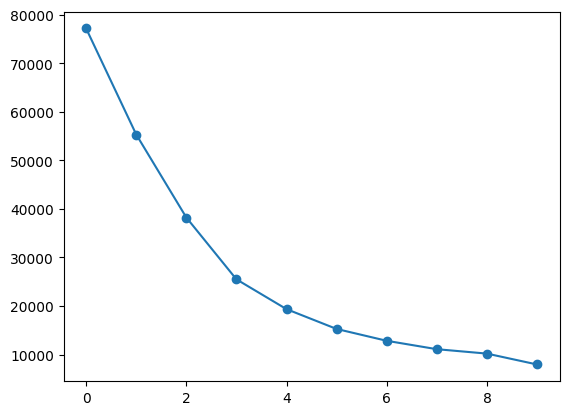

In [260]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt    
plt.plot(inertia,marker="o")

In [261]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"] =(kmeans.labels_)

In [262]:
RFM

,Recency,Frequency,Monetary,Clusters
CUSTOMER_ID,,,,
AA00312188,24,102,1040.45,2
AA00312390,1,58,687.95,2
AA00325975,1,205,1386.3,0
AA00336843,14,69,498.1,2
AA00339761,23,59,574.8,2
...,...,...,...,...
YZ04556116,173,9,39.25,1
YZ04586406,9,82,1814.7,2
YZ04658257,2,116,1029.3,2


In [265]:
group=RFM.groupby(["Clusters"])[["Recency","Frequency","Monetary"]].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
0,9.870841,195.152642,2193.103653
1,244.892487,23.343264,220.659981
2,25.185713,56.904259,528.660807
